In [1]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:09<00:00, 98.0MB/s]
100% 1.06G/1.06G [00:09<00:00, 119MB/s] 


In [2]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
# Normalize
def process(image,label):
    image = tf.cast(image/255., tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
#CNN
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 86ms/step - accuracy: 0.5704 - loss: 2.5091 - val_accuracy: 0.6614 - val_loss: 0.6269
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.6805 - loss: 0.6058 - val_accuracy: 0.6746 - val_loss: 0.6547
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.7428 - loss: 0.5186 - val_accuracy: 0.7448 - val_loss: 0.5341
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.7907 - loss: 0.4537 - val_accuracy: 0.7496 - val_loss: 0.5340
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.8072 - loss: 0.4124 - val_accuracy: 0.7838 - val_loss: 0.4629
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.8460 - loss: 0.3476 - val_accuracy: 0.7664 - val_loss: 0.5087
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.8752 - loss: 0.2891 - val_accuracy: 0.8138 - val_loss: 0.4248
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9001 - loss: 0.2396 - 

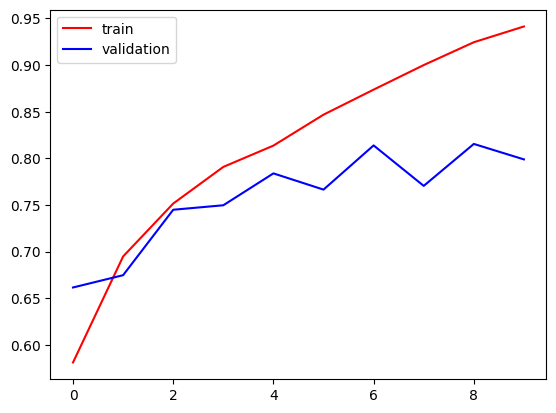

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()

plt.show()

In [35]:
#Testing on Dog
import cv2
test_img = cv2.imread('/content/dog.jpg')

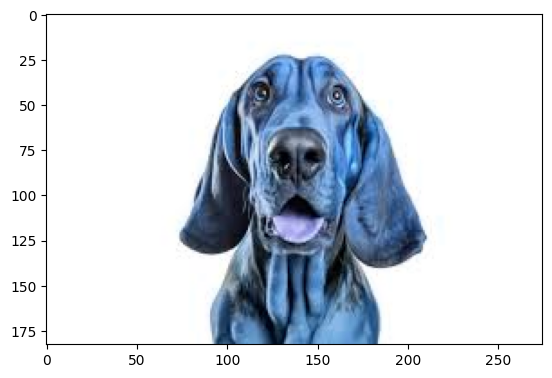

In [36]:
plt.imshow(test_img)

In [37]:
test_img.shape

(183, 275, 3)

In [38]:
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))

In [39]:
model.predict(test_input)[0][0].astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


1

In [40]:
if(model.predict(test_input)[0][0] > 0.5):
  print("Dog")
else:
  print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Dog


In [41]:
#Testing on Cat
import cv2
test_img = cv2.imread('/content/cat.jpg')

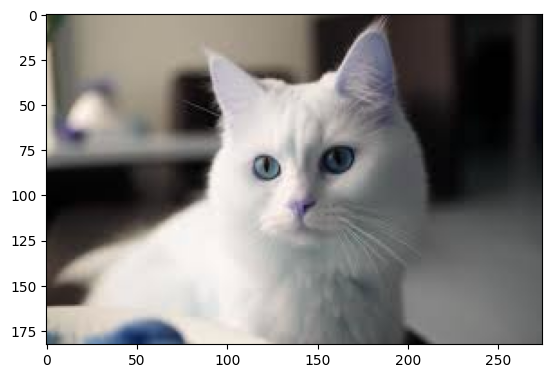

In [42]:
plt.imshow(test_img)

In [43]:
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))

In [44]:
model.predict(test_input)[0][0].astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


0

In [45]:
if(model.predict(test_input)[0][0] > 0.5):
  print("Dog")
else:
  print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Cat
